In [1]:
%matplotlib inline
#%run script
import os

os.sys.path.append("..") #script path

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt 
import defs
from scipy import stats

In [8]:
gt_dir = '../../data/HaN_MICCAI2015_Dataset/full_dataset_orig/dmaps'
ref_dir = '../../fine_stage/hr3d_h_e-3_16-72_d_100k__full_e-4_24-24_gdsc_1024s_dil13/output/50000_test/orig_size/dmaps/'


def addToDict(dictionary, key, value):
    if dictionary.get(key) is None:
        dictionary[key] = [value]
    else:
        dictionary[key].append(value)
        
dist_dict = dict()
        
for ref_file in os.listdir(ref_dir):
    for gt_file in os.listdir(gt_dir):
        if ref_file in gt_file:
            key = None
            for organ in defs.LABELS.keys():
                if organ in ref_file:
                    key = organ
                    break
            #if key is not 'Chiasm':
            #    continue
                    
            print(ref_file, gt_file, key)
            
            refimg_itk = sitk.ReadImage(os.path.join(ref_dir, ref_file))
            gtimg_itk = sitk.ReadImage(os.path.join(gt_dir, gt_file))
            
            refimg_np = sitk.GetArrayFromImage(refimg_itk)
            gtimg_np = sitk.GetArrayFromImage(gtimg_itk)
            
            addToDict(dist_dict, key, (gtimg_np - refimg_np).flatten())
            

0522c0727_Chiasm.nii.gz 0522c0727_Chiasm.nii.gz Chiasm
0522c0806_Chiasm.nii.gz 0522c0806_Chiasm.nii.gz Chiasm
0522c0555_Parotid_R.nii.gz 0522c0555_Parotid_R.nii.gz Parotid_R
0522c0661_OpticNerve_R.nii.gz 0522c0661_OpticNerve_R.nii.gz OpticNerve_R
0522c0845_BrainStem.nii.gz 0522c0845_BrainStem.nii.gz BrainStem
0522c0806_Mandible.nii.gz 0522c0806_Mandible.nii.gz Mandible
0522c0857_Chiasm.nii.gz 0522c0857_Chiasm.nii.gz Chiasm
0522c0667_OpticNerve_L.nii.gz 0522c0667_OpticNerve_L.nii.gz OpticNerve_L
0522c0806_Parotid_R.nii.gz 0522c0806_Parotid_R.nii.gz Parotid_R
0522c0857_BrainStem.nii.gz 0522c0857_BrainStem.nii.gz BrainStem
0522c0878_OpticNerve_L.nii.gz 0522c0878_OpticNerve_L.nii.gz OpticNerve_L
0522c0857_Parotid_L.nii.gz 0522c0857_Parotid_L.nii.gz Parotid_L
0522c0746_OpticNerve_R.nii.gz 0522c0746_OpticNerve_R.nii.gz OpticNerve_R
0522c0659_Chiasm.nii.gz 0522c0659_Chiasm.nii.gz Chiasm
0522c0555_OpticNerve_L.nii.gz 0522c0555_OpticNerve_L.nii.gz OpticNerve_L
0522c0598_BrainStem.nii.gz 0522c05

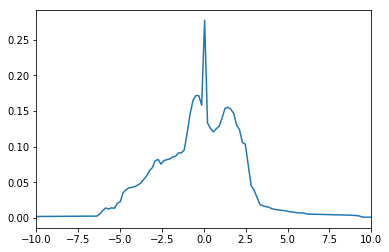

In [7]:
#print(type(dist_dict['Chiasm'][0]))
combinedlist = np.concatenate(dist_dict['Chiasm'])
fig, ax = plt.subplots()

ax.set_xlim([-10,10])
#ax.hist(combinedlist, density=True, histtype="step", bins=500)
y,binEdges=np.histogram(combinedlist,bins=1000,density=True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
ax.plot(bincenters,y,'-')

(array([1.13990496e-03, 9.72279909e-04, 9.72201662e-04, 9.25332709e-04,
        8.77173860e-04, 8.40830683e-04, 8.13411121e-04, 7.91590074e-04,
        7.76242216e-04, 7.63136452e-04, 7.53084607e-04, 7.46721880e-04,
        7.41608823e-04, 7.38389738e-04, 7.36650175e-04, 7.34775981e-04,
        7.32194176e-04, 7.33353885e-04, 7.35643146e-04, 7.39262131e-04,
        1.03840907e-03, 1.05071186e-03, 1.03449161e-03, 1.03868071e-03,
        1.04405137e-03, 1.05610816e-03, 1.07390014e-03, 1.09247705e-03,
        1.11542786e-03, 1.13960407e-03, 1.16386705e-03, 1.19411023e-03,
        1.26242317e-03, 1.55944791e-03, 1.65146784e-03, 1.69371874e-03,
        1.72454497e-03, 1.75119166e-03, 1.77780262e-03, 1.80571391e-03,
        1.83644089e-03, 1.87072525e-03, 1.91564565e-03, 1.96709061e-03,
        2.03072327e-03, 2.10509035e-03, 2.17581673e-03, 2.22812363e-03,
        2.27187480e-03, 2.30863959e-03, 2.34194516e-03, 2.37595475e-03,
        2.41036789e-03, 2.44701023e-03, 2.48878394e-03, 4.133786

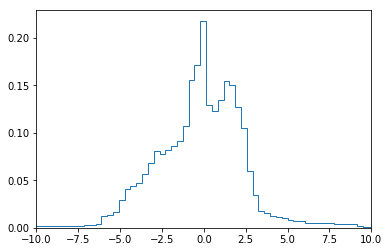

In [54]:
#print(type(dist_dict['Chiasm'][0]))
combinedlist = np.concatenate(dist_dict['Chiasm'])
fig, ax = plt.subplots()

ax.set_xlim([-10,10])
ax.hist(combinedlist, density=True, histtype="step", bins=500)